<a href="https://colab.research.google.com/github/Samsonite27/Samsonite27.github.io/blob/main/Miscellaneous/Operator_norms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Circle

In [71]:
a = 1
A = np.array([1, -2, 3, 0]).reshape(2, 2)


vector_num = 100

x_val = np.linspace(-1, 1, vector_num + 1).tolist()

y_val = [np.sqrt(1 - x**2) for x in x_val]

vector = []
color = []

color_scale = np.linspace(0, 1, vector_num + 1)
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1)

for i in range(vector_num):
  vector.append(tuple(np.matmul(A, (np.array([x_val[i], y_val[i]])).reshape(2, 1))))

operator_num = la.norm(A, 2)

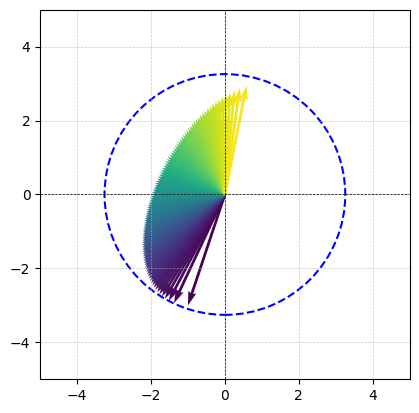

In [72]:

class VectorPlot2D:
    def __init__(self, xlim=(-10, 10), ylim=(-10, 10)):
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(xlim)
        self.ax.set_ylim(ylim)
        self.ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
        self.ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
        self.ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        self.ax.set_aspect('equal')
        self.vectors = []

    def add_vector(self, direction, start = (0, 0), color='blue', label=None):

        arrow = self.ax.quiver(
            start[0], start[1], direction[0], direction[1],
            angles='xy', scale_units='xy', scale=1, color=cmap(norm(color)), label=label
        )
        self.vectors.append((start, direction, color, label))
        if label:
            self.ax.legend()

    def add_circle(self, size, centre = (0, 0)):
      circle = Circle(centre, radius=size, edgecolor='blue', facecolor='none', linestyle='--', linewidth=1.5)
      self.ax.add_patch(circle)

    def show(self):
        plt.show()



plot = VectorPlot2D(xlim=(-5, 5), ylim=(-5, 5))

for i in range(len(vector)):
  plot.add_vector(vector[i], color=color_scale[i])

plot.add_circle(operator_num)


